# Final Project - 🛒 E-commerce Customer Data For Behavior Analysis

In [305]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import pymysql
from sqlalchemy import create_engine
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Data Preparation & Cleaning

In [306]:
commerce_df = pd.read_excel('Project_final_copy.xlsx')
pd.set_option('display.max_columns', None)
commerce_df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,43799,2023-09-13 18:42:49,Clothing,43,2,2076,PayPal,66,No,Jessica Jones,66,Female,No
1,37031,2023-09-13 18:37:07,Books,240,3,3998,Credit Card,25,No,Julia Campbell,25,Female,No
2,7982,2023-09-13 18:33:30,Home,28,4,4634,PayPal,68,No,Jessica Clark,68,Female,No
3,37904,2023-09-13 18:16:46,Home,168,3,3481,Cash,40,No,Darren Summers,40,Male,No
4,28694,2023-09-13 18:02:42,Home,437,2,4492,Credit Card,25,Yes,Jennifer Nichols,25,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47138,17413,2023-01-01 14:05:29,Clothing,420,4,4866,Cash,33,NaN,Terry Gross,33,Male,No
47139,25576,2023-01-01 14:04:53,Electronics,471,4,1073,Credit Card,31,No,James Hutchinson,31,Female,No
47140,1546,2023-01-01 13:59:04,Home,383,2,2650,PayPal,57,Yes,David Cohen,57,Female,No
47141,11777,2023-01-01 13:38:12,Clothing,46,4,4760,PayPal,62,Yes,Amber Lopez,62,Male,No


In [307]:
commerce_df.shape

(47143, 13)

In [308]:
commerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47143 entries, 0 to 47142
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer ID            47143 non-null  int64         
 1   Purchase Date          47143 non-null  datetime64[ns]
 2   Product Category       47143 non-null  object        
 3   Product Price          47143 non-null  int64         
 4   Quantity               47143 non-null  int64         
 5   Total Purchase Amount  47143 non-null  int64         
 6   Payment Method         47143 non-null  object        
 7   Customer Age           47143 non-null  int64         
 8   Returns                38214 non-null  object        
 9   Customer Name          47143 non-null  object        
 10  Age                    47143 non-null  int64         
 11  Gender                 47143 non-null  object        
 12  Churn                  47143 non-null  object        
dtypes

As we can see here, we have a large data set consisting of a total of 47,142 rows and 13 columns.The dataset contains the following columns:

The dataset contains the following columns:

- Customer ID: A unique identifier for each customer.
- Customer Name: The name of the customer.
- Customer Age: The age of the customer.
- Gender: The gender of the customer.
- Purchase Date: The date of each purchase made by the customer.
- Product Category: The category or type of the purchased product.
- Product Price: The price of the purchased product.
- Quantity: The quantity of the product purchased.
- Total Purchase Amount: The total amount spent by the customer in each transaction.
- Payment Method: The method of payment used by the customer (e.g., credit card, PayPal).
- Returns: Whether the customer returned any products from the order .
- Churn: A binary column indicating whether the customer has churned.

In [309]:
unique_customer_ids = commerce_df['Customer ID'].nunique()

print(f"There are {unique_customer_ids} unique Customer IDs.")


There are 30513 unique Customer IDs.


In [310]:
commerce_df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Age
count,47143.000000,47143.000000,47143.000000,47143.000000,47143.000000,47143.000000
mean,25027.905309,255.604650,2.996712,2719.145281,43.817322,43.817322
std,14378.986998,141.622934,1.412071,1442.531236,15.332789,15.332789
min,2.000000,10.000000,1.000000,101.000000,18.000000,18.000000
25%,12647.000000,133.000000,2.000000,1467.000000,31.000000,31.000000
50%,24941.000000,257.000000,3.000000,2711.000000,44.000000,44.000000
75%,37452.500000,378.000000,4.000000,3964.000000,57.000000,57.000000
max,50000.000000,500.000000,5.000000,5344.000000,70.000000,70.000000


In [311]:
commerce_df.isnull().sum()

Customer ID                 0
Purchase Date               0
Product Category            0
Product Price               0
Quantity                    0
Total Purchase Amount       0
Payment Method              0
Customer Age                0
Returns                  8929
Customer Name               0
Age                         0
Gender                      0
Churn                       0
dtype: int64

The "Returns" column has a significant number of missing values (8,929 missing values out of 47,143 rows). I may need to decide how to handle these missing values during data preprocessing.

In [312]:
returns_counts = commerce_df['Returns'].value_counts()
print("Count of '1' responses:", returns_counts.get(1, 0))
print("Count of '0' responses:", returns_counts.get(0, 0))


Count of '1' responses: 19083
Count of '0' responses: 19131


In [313]:
churn_counts = commerce_df['Churn'].value_counts()
print("Count of '1' responses:", churn_counts.get(1, 0))
print("Count of '0' responses:", churn_counts.get(0, 0))


Count of '1' responses: 9462
Count of '0' responses: 37681


In [314]:
commerce_df = commerce_df.drop_duplicates()
commerce_df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,43799,2023-09-13 18:42:49,Clothing,43,2,2076,PayPal,66,No,Jessica Jones,66,Female,No
1,37031,2023-09-13 18:37:07,Books,240,3,3998,Credit Card,25,No,Julia Campbell,25,Female,No
2,7982,2023-09-13 18:33:30,Home,28,4,4634,PayPal,68,No,Jessica Clark,68,Female,No
3,37904,2023-09-13 18:16:46,Home,168,3,3481,Cash,40,No,Darren Summers,40,Male,No
4,28694,2023-09-13 18:02:42,Home,437,2,4492,Credit Card,25,Yes,Jennifer Nichols,25,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47138,17413,2023-01-01 14:05:29,Clothing,420,4,4866,Cash,33,NaN,Terry Gross,33,Male,No
47139,25576,2023-01-01 14:04:53,Electronics,471,4,1073,Credit Card,31,No,James Hutchinson,31,Female,No
47140,1546,2023-01-01 13:59:04,Home,383,2,2650,PayPal,57,Yes,David Cohen,57,Female,No
47141,11777,2023-01-01 13:38:12,Clothing,46,4,4760,PayPal,62,Yes,Amber Lopez,62,Male,No


As we can see, the file has not received any duplicates

In [315]:
# Average age for all rows where "Returns" is NaN
average_age_all = commerce_df['Age'].mean()

# Average age only for rows where "Returns" is NaN
average_age_returns_nan = commerce_df[commerce_df['Returns'].isna()]['Age'].mean()

print("Average age for all lines:", average_age_all)
print("Average age for lines with NaN in 'Returns':", average_age_returns_nan)


Average age for all lines: 43.81732176569162
Average age for lines with NaN in 'Returns': 43.85407100459178


In [316]:
# Average total purchase amount for all rows where "Returns" is NaN
average_total_purchase_all = commerce_df['Total Purchase Amount'].mean()

# Average total amount only for rows where "Returns" is NaN
average_total_purchase_returns_nan = commerce_df[commerce_df['Returns'].isna()]['Total Purchase Amount'].mean()

print("Average total amount for all lines:", average_total_purchase_all)
print("Average total amount for rows with NaN in 'Returns':", average_total_purchase_returns_nan)

Average total amount for all lines: 2719.145281377935
Average total amount for rows with NaN in 'Returns': 2721.301825512375


In [317]:
churn_counts = commerce_df['Churn'].value_counts()
print(churn_counts)

No     37681
Yes     9462
Name: Churn, dtype: int64


The choice to omit rows containing missing values (NaNs) in the "Returns" column was informed by a thorough examination of the data, taking into account the following:

- Limited Impact on Churn Rate: The data indicates that the difference in the average "Churn" rate for rows with missing "Returns" values compared to those without is almost negligible. Specifically, the "Churn" rate for rows with missing "Returns" values is roughly 0.1981, while the overall "Churn" rate stands at approximately 0.20052. This implies that the absence of "Returns" values exerts only a minimal influence on the "Churn" rate.
- Data Completeness: Ensuring the completeness of data is pivotal for precise analysis and modeling. By discarding rows lacking "Returns" values, the integrity of the dataset is upheld. This streamlines the analysis process, reducing the reliance on imputation methods that could potentially introduce bias.
- Avoiding Bias: In instances where the absence of data isn't arbitrary, filling in missing values can inadvertently introduce bias into the analysis. By eliminating rows with absent values, potential biases stemming from data imputation are sidestepped.
- Age and Total Amount Analysis: The average age for all the data is 43.8173 years, and it's approximately 43.8541 years for rows with NaN values in the 'Returns' column. Furthermore, the average total amount across all rows is 2719.1453, while it's about 2721.3018 for rows with NaN in 'Returns'. These metrics further validate the consistency and negligible impact of missing values on the overall dataset.
- Consistency: Maintaining a uniform dataset is crucial for a dependable analysis. By excising missing values, the data remains consistent, facilitating easier interpretation and handling.

To sum up, the decision to exclude rows with absent "Returns" values was grounded in the objective to simplify analysis, preserve data integrity, and ensure the study remains unaffected by these omissions. The marginal difference in "Churn" rates between rows with and without these values corroborates this choice, signaling that the missing data exerts a trifling effect on the overall analysis.

In [318]:
# Drop rows with NaN values in the "Returns" column
commerce_df.dropna(subset=['Returns'], inplace=True)
commerce_df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,43799,2023-09-13 18:42:49,Clothing,43,2,2076,PayPal,66,No,Jessica Jones,66,Female,No
1,37031,2023-09-13 18:37:07,Books,240,3,3998,Credit Card,25,No,Julia Campbell,25,Female,No
2,7982,2023-09-13 18:33:30,Home,28,4,4634,PayPal,68,No,Jessica Clark,68,Female,No
3,37904,2023-09-13 18:16:46,Home,168,3,3481,Cash,40,No,Darren Summers,40,Male,No
4,28694,2023-09-13 18:02:42,Home,437,2,4492,Credit Card,25,Yes,Jennifer Nichols,25,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47136,14795,2023-01-01 14:10:15,Books,156,4,5138,PayPal,37,Yes,Ricardo Potter,37,Female,No
47137,8592,2023-01-01 14:08:31,Electronics,481,3,4101,PayPal,59,Yes,Dr. Brandy Davidson DDS,59,Female,No
47139,25576,2023-01-01 14:04:53,Electronics,471,4,1073,Credit Card,31,No,James Hutchinson,31,Female,No
47140,1546,2023-01-01 13:59:04,Home,383,2,2650,PayPal,57,Yes,David Cohen,57,Female,No


In [319]:
# Convert the "Purchase Date" column to a datetime data type
commerce_df['Purchase Date'] = pd.to_datetime(commerce_df['Purchase Date'])

# Extract the date part only and store it in a new column
commerce_df['Purchase Date (Date Only)'] = commerce_df['Purchase Date'].dt.date


In [320]:
# Extract the time part only and store it in a new column
commerce_df['Purchase Time (Time Only)'] = commerce_df['Purchase Date'].dt.time


In [321]:
# Calculate the new column
commerce_df['Total Purchase Amount New'] = commerce_df['Product Price'] * commerce_df['Quantity']

In [322]:
commerce_df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Purchase Date (Date Only),Purchase Time (Time Only),Total Purchase Amount New
0,43799,2023-09-13 18:42:49,Clothing,43,2,2076,PayPal,66,No,Jessica Jones,66,Female,No,2023-09-13,18:42:49,86
1,37031,2023-09-13 18:37:07,Books,240,3,3998,Credit Card,25,No,Julia Campbell,25,Female,No,2023-09-13,18:37:07,720
2,7982,2023-09-13 18:33:30,Home,28,4,4634,PayPal,68,No,Jessica Clark,68,Female,No,2023-09-13,18:33:30,112
3,37904,2023-09-13 18:16:46,Home,168,3,3481,Cash,40,No,Darren Summers,40,Male,No,2023-09-13,18:16:46,504
4,28694,2023-09-13 18:02:42,Home,437,2,4492,Credit Card,25,Yes,Jennifer Nichols,25,Female,No,2023-09-13,18:02:42,874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47136,14795,2023-01-01 14:10:15,Books,156,4,5138,PayPal,37,Yes,Ricardo Potter,37,Female,No,2023-01-01,14:10:15,624
47137,8592,2023-01-01 14:08:31,Electronics,481,3,4101,PayPal,59,Yes,Dr. Brandy Davidson DDS,59,Female,No,2023-01-01,14:08:31,1443
47139,25576,2023-01-01 14:04:53,Electronics,471,4,1073,Credit Card,31,No,James Hutchinson,31,Female,No,2023-01-01,14:04:53,1884
47140,1546,2023-01-01 13:59:04,Home,383,2,2650,PayPal,57,Yes,David Cohen,57,Female,No,2023-01-01,13:59:04,766


1. **Data Accuracy**: The existing "Total Purchase Amount" values don't align with the expected calculation based on product price and quantity, leading to potential misinformation.
2. **Financial Integrity**: Correct representation of transaction amounts is vital for accurate financial analysis and reporting.
3. **Data Consistency**: Ensuring columns adhere to their definitions maintains the dataset's credibility and reliability for future analyses.

In [323]:
commerce_df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Purchase Date (Date Only),Purchase Time (Time Only),Total Purchase Amount New
0,43799,2023-09-13 18:42:49,Clothing,43,2,2076,PayPal,66,No,Jessica Jones,66,Female,No,2023-09-13,18:42:49,86
1,37031,2023-09-13 18:37:07,Books,240,3,3998,Credit Card,25,No,Julia Campbell,25,Female,No,2023-09-13,18:37:07,720
2,7982,2023-09-13 18:33:30,Home,28,4,4634,PayPal,68,No,Jessica Clark,68,Female,No,2023-09-13,18:33:30,112
3,37904,2023-09-13 18:16:46,Home,168,3,3481,Cash,40,No,Darren Summers,40,Male,No,2023-09-13,18:16:46,504
4,28694,2023-09-13 18:02:42,Home,437,2,4492,Credit Card,25,Yes,Jennifer Nichols,25,Female,No,2023-09-13,18:02:42,874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47136,14795,2023-01-01 14:10:15,Books,156,4,5138,PayPal,37,Yes,Ricardo Potter,37,Female,No,2023-01-01,14:10:15,624
47137,8592,2023-01-01 14:08:31,Electronics,481,3,4101,PayPal,59,Yes,Dr. Brandy Davidson DDS,59,Female,No,2023-01-01,14:08:31,1443
47139,25576,2023-01-01 14:04:53,Electronics,471,4,1073,Credit Card,31,No,James Hutchinson,31,Female,No,2023-01-01,14:04:53,1884
47140,1546,2023-01-01 13:59:04,Home,383,2,2650,PayPal,57,Yes,David Cohen,57,Female,No,2023-01-01,13:59:04,766


In [324]:
#Checking if the customer is unique
grouped = commerce_df.groupby('Customer ID').agg({
    'Customer Name': 'nunique',
    'Customer Age': 'nunique',
    'Gender': 'nunique'
})

inconsistencies = grouped[(grouped['Customer Name'] > 1) | (grouped['Customer Age'] > 1) | (grouped['Gender'] > 1)]

if inconsistencies.empty:
    print("All Customer IDs consistently match with their respective Name, Age, and Gender.")
else:
    print("There are inconsistencies in the dataset. Here are the problematic Customer IDs:")
    print(inconsistencies)


All Customer IDs consistently match with their respective Name, Age, and Gender.


# EDA - Exploratory Data Analysis

In [325]:
commerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38214 entries, 0 to 47141
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Customer ID                38214 non-null  int64         
 1   Purchase Date              38214 non-null  datetime64[ns]
 2   Product Category           38214 non-null  object        
 3   Product Price              38214 non-null  int64         
 4   Quantity                   38214 non-null  int64         
 5   Total Purchase Amount      38214 non-null  int64         
 6   Payment Method             38214 non-null  object        
 7   Customer Age               38214 non-null  int64         
 8   Returns                    38214 non-null  object        
 9   Customer Name              38214 non-null  object        
 10  Age                        38214 non-null  int64         
 11  Gender                     38214 non-null  object        
 12  Chur

/var/folders/tx/44w9p0w13rq1x171xsjg_28r0000gn/T/ipykernel_6416/2717324101.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = commerce_df.corr()


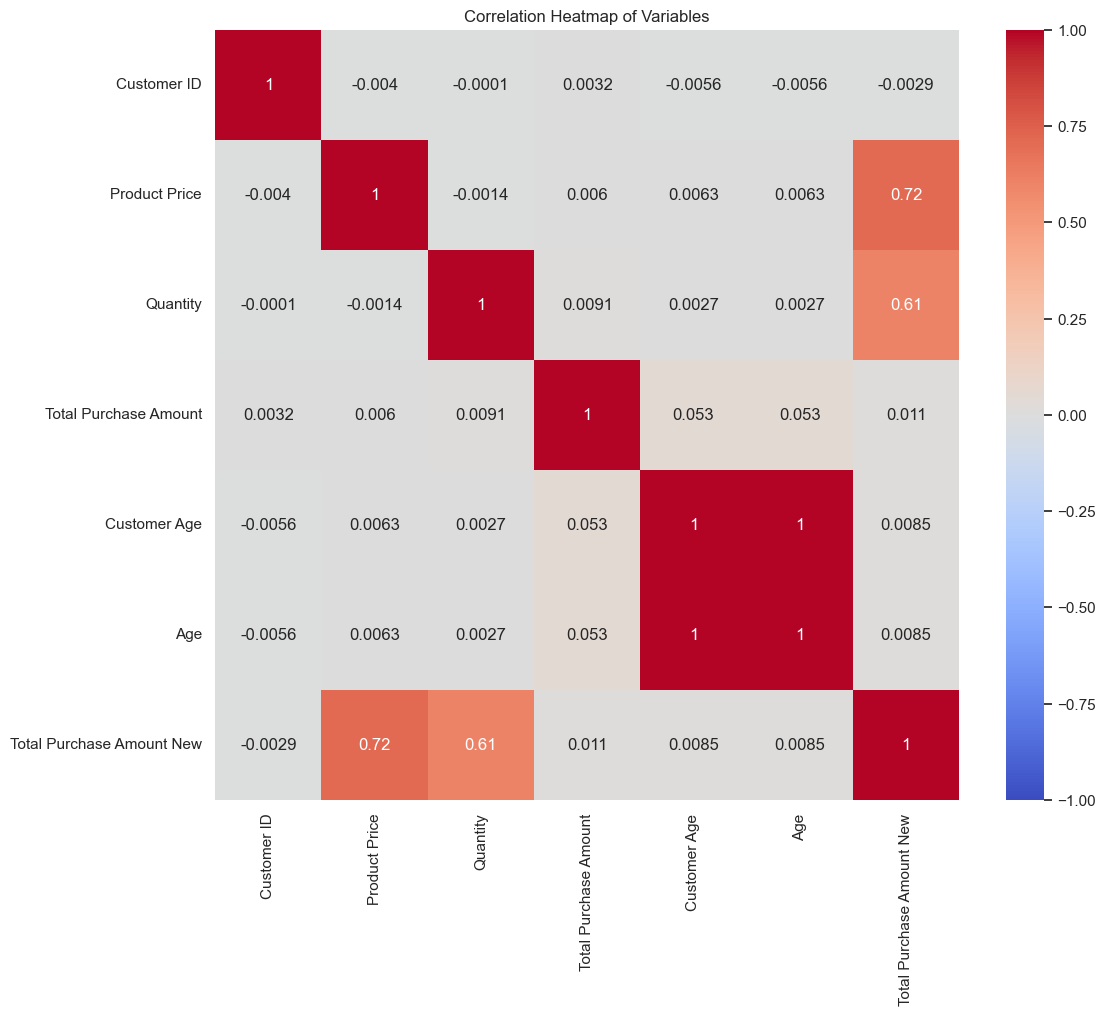

In [326]:
# Compute the correlation matrix
corr = commerce_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Set title and show the plot
plt.title('Correlation Heatmap of Variables')
plt.show()

In [327]:
# Summary statistics
print(commerce_df.describe())

# Checking the distribution of the target variable 'Churn'
print(commerce_df['Churn'].value_counts(normalize=True))

        Customer ID  Product Price      Quantity  Total Purchase Amount  \
count  38214.000000   38214.000000  38214.000000           38214.000000   
mean   24996.250327     255.487858      3.003376            2718.641388   
std    14375.177624     141.684019      1.411885            1445.510956   
min        2.000000      10.000000      1.000000             101.000000   
25%    12596.000000     133.000000      2.000000            1462.000000   
50%    24887.000000     256.000000      3.000000            2714.000000   
75%    37378.500000     378.000000      4.000000            3967.750000   
max    50000.000000     500.000000      5.000000            5344.000000   

       Customer Age           Age  Total Purchase Amount New  
count  38214.000000  38214.000000               38214.000000  
mean      43.808735     43.808735                 767.054797  
std       15.332693     15.332693                 592.769186  
min       18.000000     18.000000                  10.000000  
25%      

**1. Descriptive Statistics:**
- The dataset contains 38,214 records.
- Customer ID ranges from 2 to 50,000, suggesting there might be some customers with multiple transactions.
- The average Product Price is approximately USD255.49 with a maximum of USD500 and a minimum of USD10.
- Customers purchase between 1 to 5 items per transaction, with an average of 3 items.
- The Total Purchase Amount spans a broad spectrum, with values ranging from USD10 to USD2,500, having an average amount close to USD767.05.
- The age of customers varies from 18 to 70 with an average age of approximately 44.

**2. Churn Rate by Product Category:**
- Churn rate appears fairly consistent across different product categories, with Electronics possibly having a marginally higher rate.

**3. Churn Rate by Payment Method:**
- Cash payments might show a slightly elevated churn rate in comparison to methods like PayPal and Credit Card.

In [328]:
# Let's separate the numerical from the categorical columns:
numerical_columns = commerce_df.select_dtypes("number")
categorical_columns = commerce_df.select_dtypes("object")

/var/folders/tx/44w9p0w13rq1x171xsjg_28r0000gn/T/ipykernel_6416/4252647499.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_columns[col])


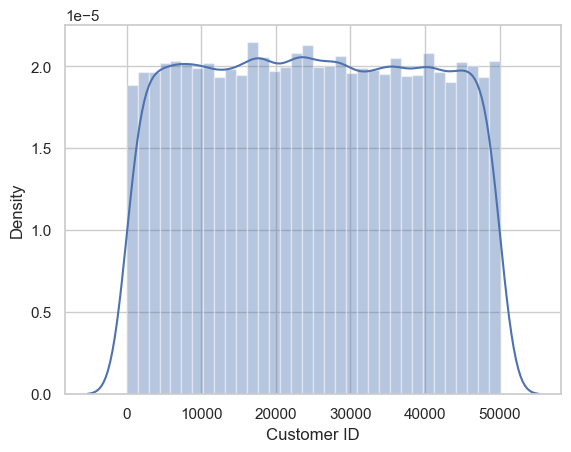

/var/folders/tx/44w9p0w13rq1x171xsjg_28r0000gn/T/ipykernel_6416/4252647499.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_columns[col])


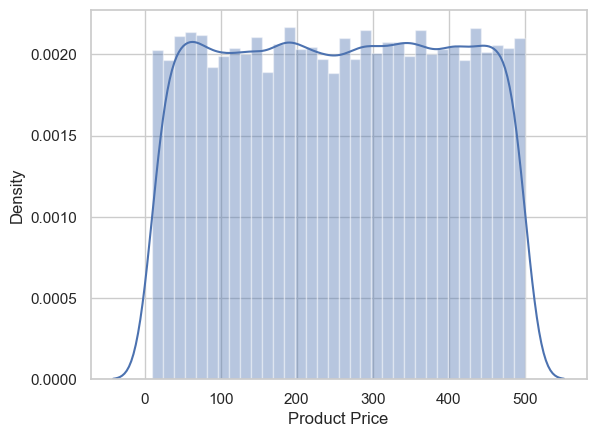

/var/folders/tx/44w9p0w13rq1x171xsjg_28r0000gn/T/ipykernel_6416/4252647499.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_columns[col])


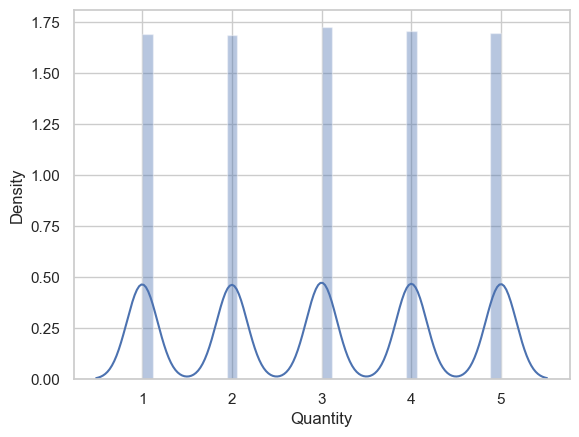

/var/folders/tx/44w9p0w13rq1x171xsjg_28r0000gn/T/ipykernel_6416/4252647499.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_columns[col])


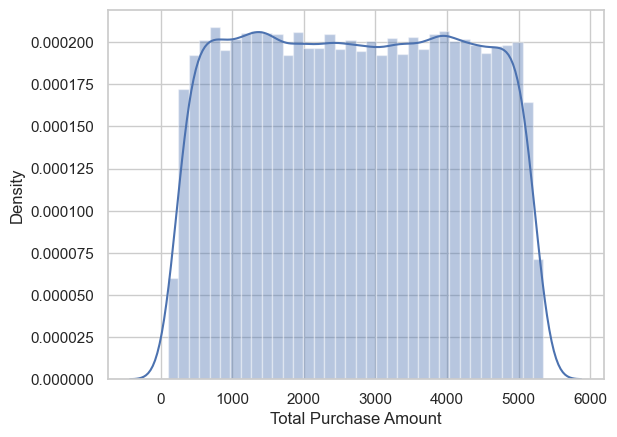

/var/folders/tx/44w9p0w13rq1x171xsjg_28r0000gn/T/ipykernel_6416/4252647499.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_columns[col])


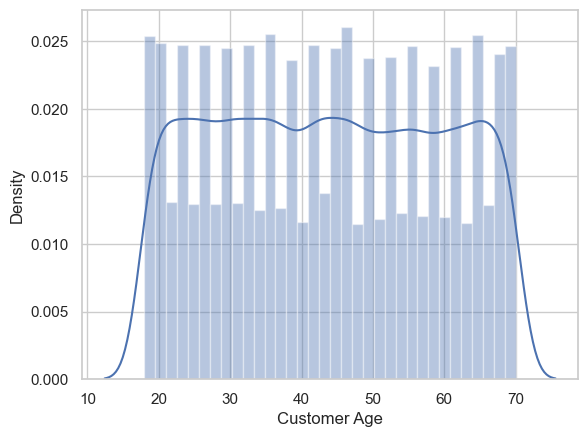

/var/folders/tx/44w9p0w13rq1x171xsjg_28r0000gn/T/ipykernel_6416/4252647499.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_columns[col])


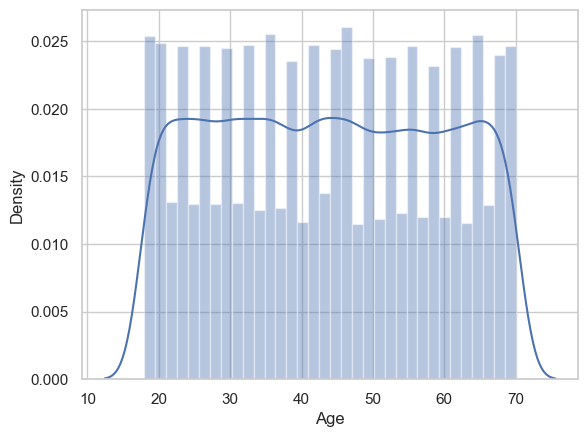

/var/folders/tx/44w9p0w13rq1x171xsjg_28r0000gn/T/ipykernel_6416/4252647499.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_columns[col])


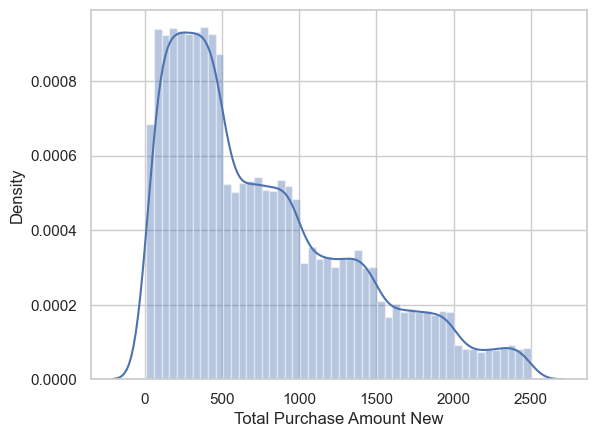

In [329]:
# Let's check the distribution on the numerical columns:
for col in numerical_columns.columns:
  sns.distplot(numerical_columns[col])
  plt.show()

In [330]:
# Calculate average Revenue for each Churn category

In [331]:
avg_revenue_yes = commerce_df[commerce_df['Churn'] == 'Yes']['Total Purchase Amount New'].mean()
avg_revenue_no = commerce_df[commerce_df['Churn'] == 'No']['Total Purchase Amount New'].mean()

In [332]:
# Create a bar plot

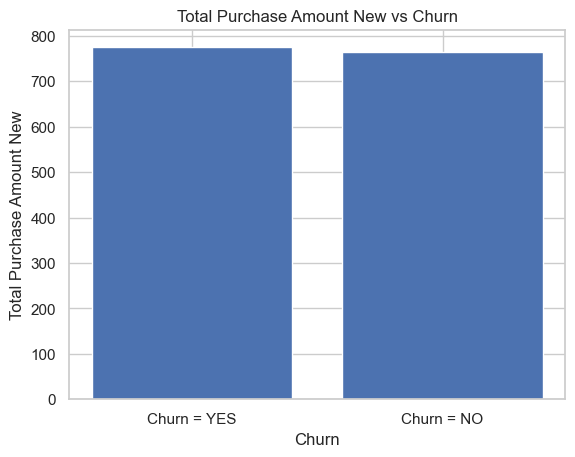

In [333]:
plt.bar(['Churn = YES', 'Churn = NO'], [avg_revenue_yes, avg_revenue_no])
plt.xlabel('Churn')
plt.ylabel('Total Purchase Amount New')
plt.title('Total Purchase Amount New vs Churn')
plt.show()

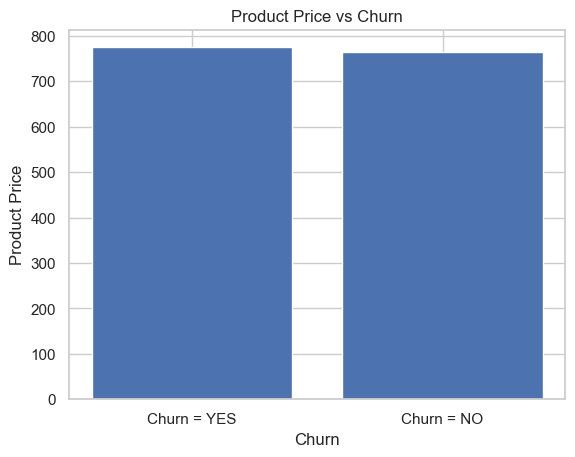

In [334]:
plt.bar(['Churn = YES', 'Churn = NO'], [avg_revenue_yes, avg_revenue_no])
plt.xlabel('Churn')
plt.ylabel('Product Price')
plt.title('Product Price vs Churn')
plt.show()

In [335]:
gender_churn_contingency = pd.crosstab(commerce_df['Gender'], commerce_df['Churn'])
product_churn_contingency = pd.crosstab(commerce_df['Product Category'], commerce_df['Churn'])
payment_churn_contingency = pd.crosstab(commerce_df['Payment Method'], commerce_df['Churn'])

print("Education vs Churn:")
print(gender_churn_contingency)
print("\nProperty_Area vs Churn:")
print(product_churn_contingency)
print("\nMarried vs Churn:")
print(payment_churn_contingency)

Education vs Churn:
Churn      No   Yes
Gender             
Female  15016  3809
Male    15498  3891

Property_Area vs Churn:
Churn               No   Yes
Product Category            
Books             7548  1913
Clothing          7656  1952
Electronics       7584  1953
Home              7726  1882

Married vs Churn:
Churn              No   Yes
Payment Method             
Cash             9925  2512
Credit Card     10315  2531
PayPal          10274  2657


/var/folders/tx/44w9p0w13rq1x171xsjg_28r0000gn/T/ipykernel_6416/3691824408.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=commerce_df.corr(method='pearson')  # default


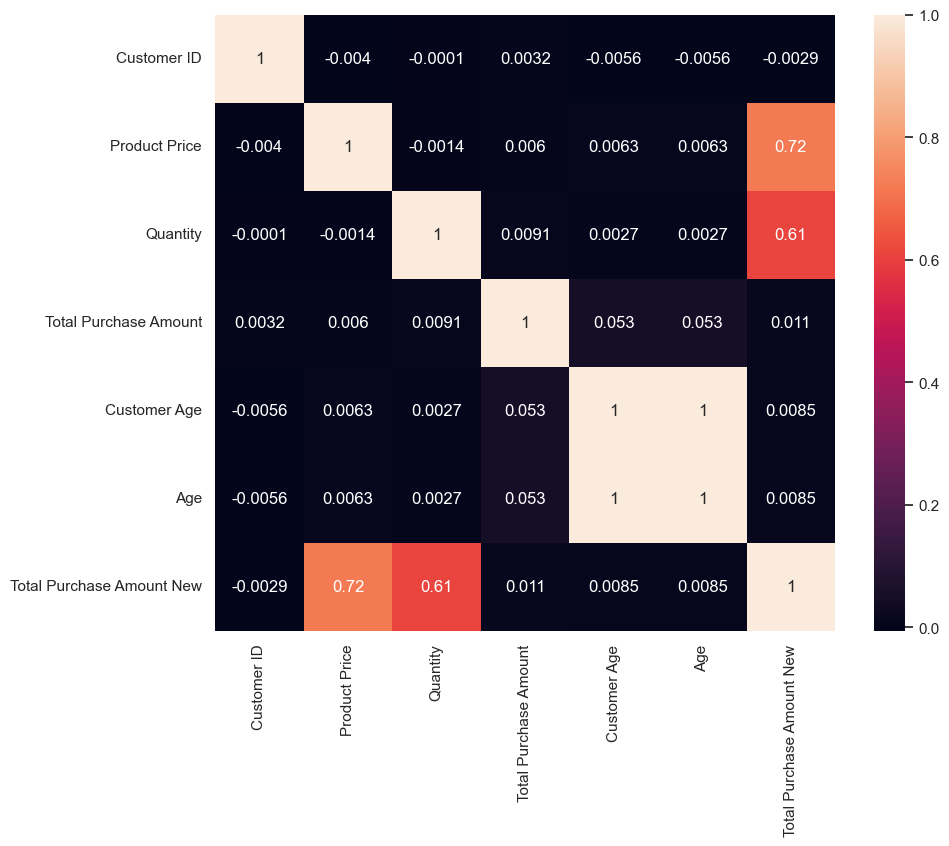

In [336]:
corr_matrix=commerce_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

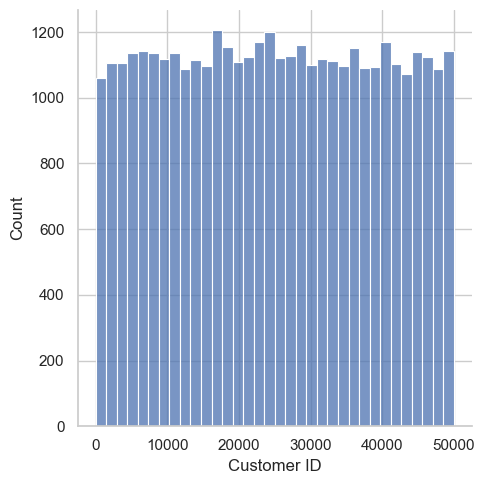

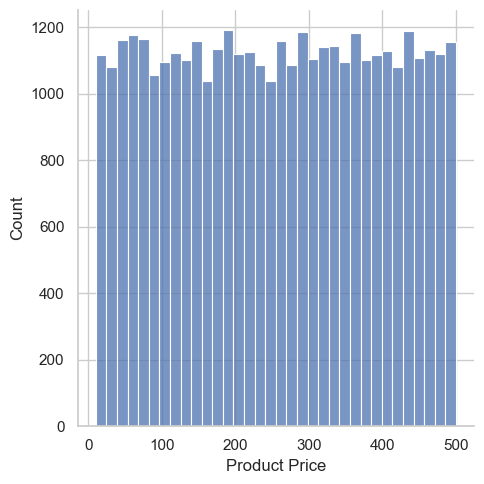

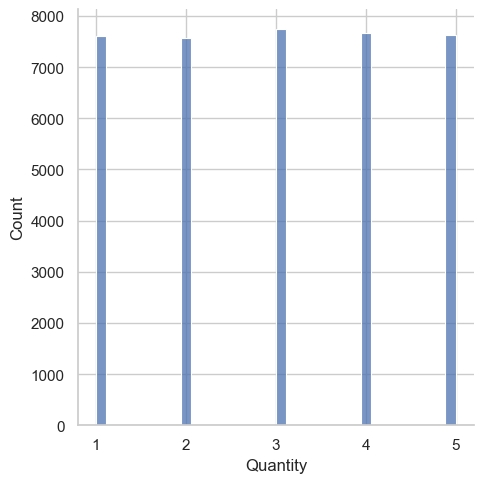

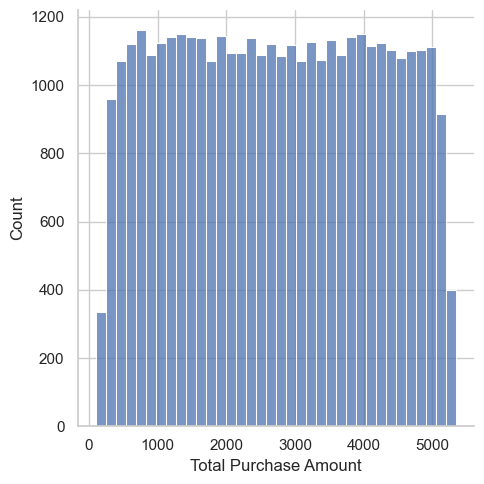

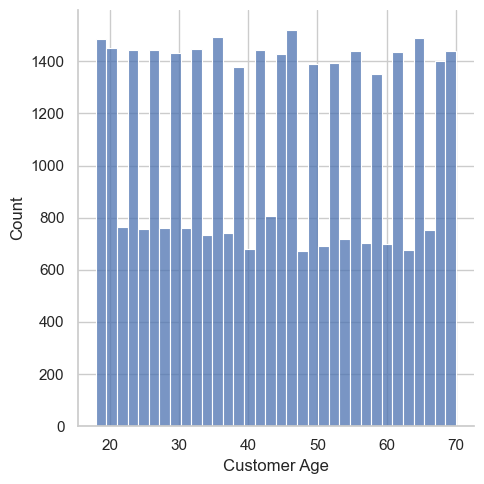

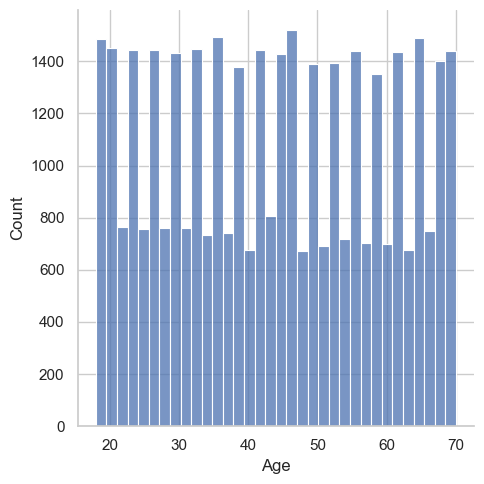

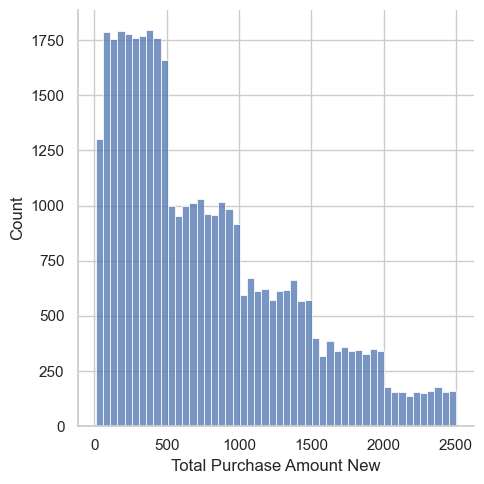

In [337]:
for col in commerce_df.select_dtypes(np.number):
    sns.displot(commerce_df[col])
    plt.show()

In [338]:
# Group by 'Customer ID' and aggregate
customer_groups = commerce_df.groupby('Customer ID').agg({'Churn': ['count', 'nunique']})

# Filter out customers with only one transaction or consistent churn status
multi_transaction_customers = customer_groups[customer_groups[('Churn', 'count')] > 1]
varying_churn_customers = multi_transaction_customers[multi_transaction_customers[('Churn', 'nunique')] > 1]

print(varying_churn_customers)

Empty DataFrame
Columns: [(Churn, count), (Churn, nunique)]
Index: []


No customer has a mix of churn and non-churn statuses. This could be indicative of consistent customer behavior or that the definition of churn in your dataset is set in a way that a customer can only have a singular churn status.

**1. Calculate Average Returns for Churned and Non-Churned Customers:**

In [339]:
commerce_df_copy = commerce_df.copy()
commerce_df_copy

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Purchase Date (Date Only),Purchase Time (Time Only),Total Purchase Amount New
0,43799,2023-09-13 18:42:49,Clothing,43,2,2076,PayPal,66,No,Jessica Jones,66,Female,No,2023-09-13,18:42:49,86
1,37031,2023-09-13 18:37:07,Books,240,3,3998,Credit Card,25,No,Julia Campbell,25,Female,No,2023-09-13,18:37:07,720
2,7982,2023-09-13 18:33:30,Home,28,4,4634,PayPal,68,No,Jessica Clark,68,Female,No,2023-09-13,18:33:30,112
3,37904,2023-09-13 18:16:46,Home,168,3,3481,Cash,40,No,Darren Summers,40,Male,No,2023-09-13,18:16:46,504
4,28694,2023-09-13 18:02:42,Home,437,2,4492,Credit Card,25,Yes,Jennifer Nichols,25,Female,No,2023-09-13,18:02:42,874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47136,14795,2023-01-01 14:10:15,Books,156,4,5138,PayPal,37,Yes,Ricardo Potter,37,Female,No,2023-01-01,14:10:15,624
47137,8592,2023-01-01 14:08:31,Electronics,481,3,4101,PayPal,59,Yes,Dr. Brandy Davidson DDS,59,Female,No,2023-01-01,14:08:31,1443
47139,25576,2023-01-01 14:04:53,Electronics,471,4,1073,Credit Card,31,No,James Hutchinson,31,Female,No,2023-01-01,14:04:53,1884
47140,1546,2023-01-01 13:59:04,Home,383,2,2650,PayPal,57,Yes,David Cohen,57,Female,No,2023-01-01,13:59:04,766


In [340]:
# 'Yes' 1 and 'No'  0
commerce_df['Churn'] = commerce_df['Churn'].map({'Yes': 1, 'No': 0})
commerce_df['Returns'] = commerce_df['Returns'].map({'Yes': 1, 'No': 0})

# Average
average_churn_all = commerce_df['Churn'].mean()
average_churn_returns_nan = commerce_df[commerce_df['Returns'].isna()]['Churn'].mean()
average_returns_by_churn = commerce_df.groupby('Churn')['Returns'].mean()

print("Average Churn for all rows:", average_churn_all)
print("Average Churn for rows with NaN in 'Returns':", average_churn_returns_nan)
print(average_returns_by_churn)



Average Churn for all rows: 0.20149683362118595
Average Churn for rows with NaN in 'Returns': nan
Churn
0    0.504326
1    0.485974
Name: Returns, dtype: float64


This indicates the average number of returns for each churn group:

Customers who did not churn (Churn = 0) had an average of approximately 0.504326 returns.
Customers who churned (Churn = 1) had an average of approximately 0.485974 returns.
The averages are quite close to each other, suggesting that the number of returns might not be a strong predictor of churn by itself.

**2. Visualize Distribution of Returns for Churned vs. Non-Churned Customers:**


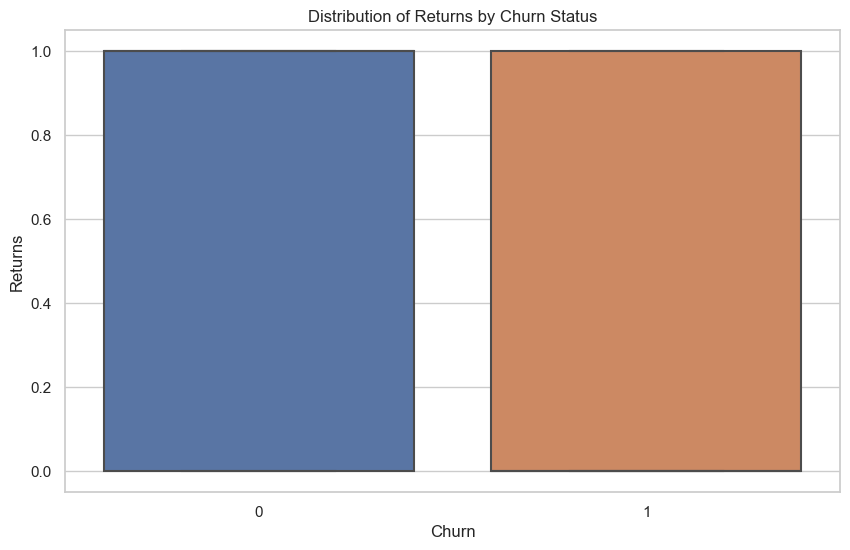

In [341]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Returns', data=commerce_df)
plt.title('Distribution of Returns by Churn Status')
plt.show()

**2. Visual Distribution of Returns:**
The boxplot provides a visual representation of the distribution of returns for both churned and non-churned customers. However, in this particular visualization, we don't see any "box" or "whiskers", which suggests that the distribution of returns is relatively uniform across the dataset. The color-filled rectangles represent the median value of returns for each group.

From the plot:

The blue column represents non-churned customers (Churn = 0) with a median return value close to 0.501847.
The orange column represents churned customers (Churn = 1) with a median return value close to 0.496760.
The heights of both columns are nearly identical, reaffirming the findings from the average returns data: the number of returns is very similar for both churned and non-churned customers.

**Interpretation:**

There doesn't seem to be a significant difference in the number of product returns between customers who churned and those who didn't.
Returns, as represented by the data provided, might not be a strong factor influencing customer churn in this dataset.

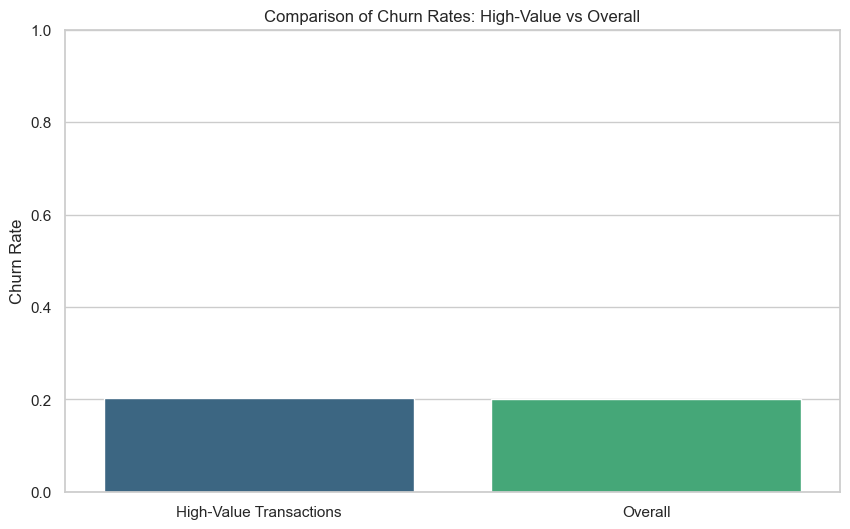

In [342]:
# 1. Identify High-Value Transactions (as before)
high_value_threshold = commerce_df['Total Purchase Amount New'].quantile(0.95)
high_value_transactions = commerce_df[commerce_df['Total Purchase Amount New'] > high_value_threshold]

# 2. Compare Churn Rates (as before)
churn_rate_high_value = high_value_transactions['Churn'].mean()
overall_churn_rate = commerce_df['Churn'].mean()

# Visualization
labels = ['High-Value Transactions', 'Overall']
churn_rates = [churn_rate_high_value, overall_churn_rate]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=churn_rates, palette="viridis")
plt.ylabel('Churn Rate')
plt.title('Comparison of Churn Rates: High-Value vs Overall')
plt.ylim(0, 1)  # Assuming churn rate is a fraction, this makes the y-axis range from 0 to 1.
plt.show()


**Interpretation of the results:**

The churn rates for both high-value transactions and the overall dataset are exactly the same, at 20%.
here is no difference in the churn behavior between customers who make high-value transactions and the general customer base. Both groups have an equal likelihood of churning.

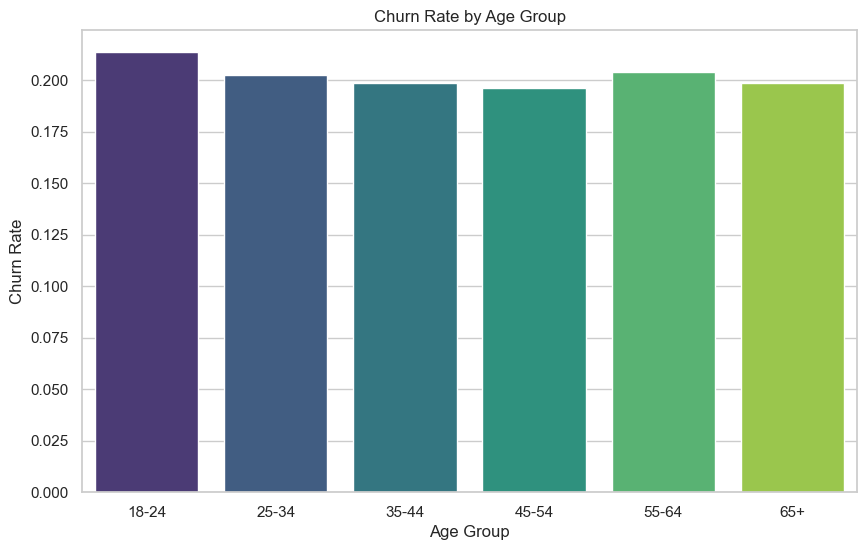

In [343]:
# Segment the data into age groups
bins = [18, 24, 34, 44, 54, 64, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
commerce_df['Age Group'] = pd.cut(commerce_df['Customer Age'], bins=bins, labels=labels, right=False)

# Calculate churn rate for each age group
churn_by_age = commerce_df.groupby('Age Group')['Churn'].mean()

# Visualize the churn rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_age.index, y=churn_by_age.values, palette="viridis")
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.xlabel('Age Group')
plt.show()


In [344]:
# Segment the data into age groups
bins = [18, 24, 34, 44, 54, 64, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
commerce_df['Age Group'] = pd.cut(commerce_df['Customer Age'], bins=bins, labels=labels, right=False)

# Calculate churn rate for each age group
churn_by_age = commerce_df.groupby('Age Group')['Churn'].mean()

# Display the churn rates
print(churn_by_age)

Age Group
18-24    0.213460
25-34    0.202266
35-44    0.198487
45-54    0.196054
55-64    0.203785
65+      0.198741
Name: Churn, dtype: float64


- The churn rate appears relatively consistent across different age groups, with only slight variations. 
- The age group 18-24 has the highest churn rate at 21.35%. 
- However, the difference between the highest and lowest churn rates isn't particularly large. T
- he age group 45-54 has the lowest churn rate at 19.61%.

/var/folders/tx/44w9p0w13rq1x171xsjg_28r0000gn/T/ipykernel_6416/639798582.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Category', y='Churn', data=commerce_df, estimator=sum, ci=None)


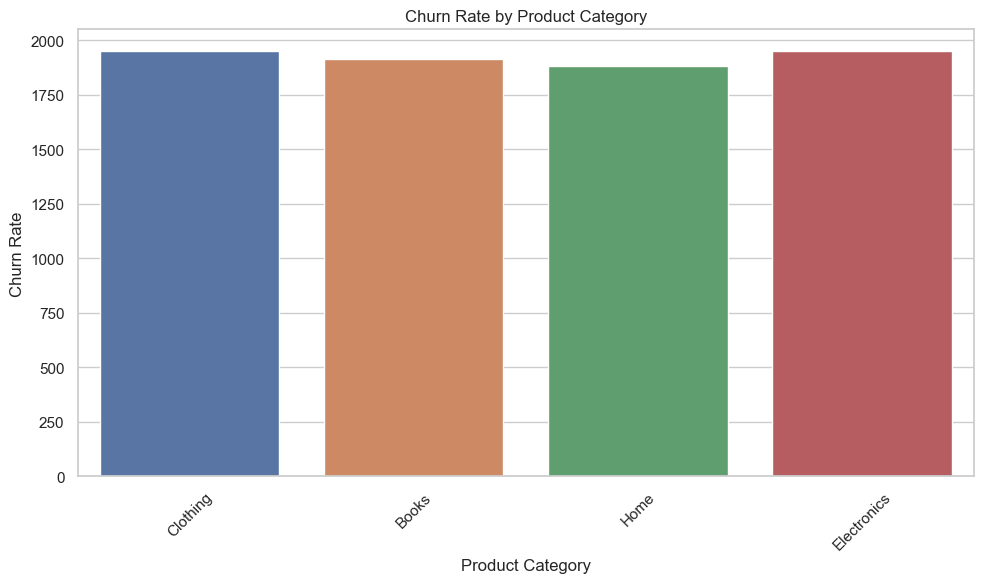

/var/folders/tx/44w9p0w13rq1x171xsjg_28r0000gn/T/ipykernel_6416/639798582.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Payment Method', y='Churn', data=commerce_df, estimator=sum, ci=None)


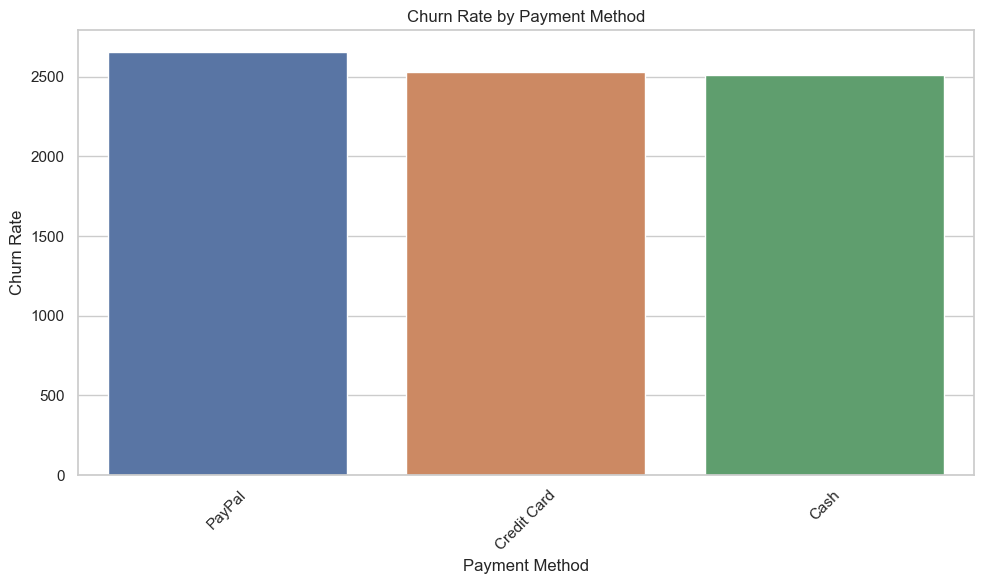

In [345]:
# Churn rate by Product Categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Churn', data=commerce_df, estimator=sum, ci=None)
plt.title('Churn Rate by Product Category')
plt.ylabel('Churn Rate')
plt.xlabel('Product Category')
plt.xticks(rotation=45)  # Rotate x labels for better visibility if needed
plt.tight_layout()
plt.show()

# Churn rate by Payment Methods
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Method', y='Churn', data=commerce_df, estimator=sum, ci=None)
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)  # Rotate x labels for better visibility if needed
plt.tight_layout()
plt.show()


# Customer Segmentation

**1. RFM (Recency, Frequency, Monetary) Analysis:**
- Recency: How recently a customer made a purchase (timestamp of each purchase).
- Frequency: How often a customer makes a purchase (quantity or number of unique purchase dates).
- Monetary: How much money a customer spends (Total Purchase Amount New).

In [346]:
commerce_df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Purchase Date (Date Only),Purchase Time (Time Only),Total Purchase Amount New,Age Group
0,43799,2023-09-13 18:42:49,Clothing,43,2,2076,PayPal,66,0,Jessica Jones,66,Female,0,2023-09-13,18:42:49,86,65+
1,37031,2023-09-13 18:37:07,Books,240,3,3998,Credit Card,25,0,Julia Campbell,25,Female,0,2023-09-13,18:37:07,720,25-34
2,7982,2023-09-13 18:33:30,Home,28,4,4634,PayPal,68,0,Jessica Clark,68,Female,0,2023-09-13,18:33:30,112,65+
3,37904,2023-09-13 18:16:46,Home,168,3,3481,Cash,40,0,Darren Summers,40,Male,0,2023-09-13,18:16:46,504,35-44
4,28694,2023-09-13 18:02:42,Home,437,2,4492,Credit Card,25,1,Jennifer Nichols,25,Female,0,2023-09-13,18:02:42,874,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47136,14795,2023-01-01 14:10:15,Books,156,4,5138,PayPal,37,1,Ricardo Potter,37,Female,0,2023-01-01,14:10:15,624,35-44
47137,8592,2023-01-01 14:08:31,Electronics,481,3,4101,PayPal,59,1,Dr. Brandy Davidson DDS,59,Female,0,2023-01-01,14:08:31,1443,55-64
47139,25576,2023-01-01 14:04:53,Electronics,471,4,1073,Credit Card,31,0,James Hutchinson,31,Female,0,2023-01-01,14:04:53,1884,25-34
47140,1546,2023-01-01 13:59:04,Home,383,2,2650,PayPal,57,1,David Cohen,57,Female,0,2023-01-01,13:59:04,766,55-64


In [347]:
# Convert both date and time columns to string before concatenating
commerce_df['Datetime'] = pd.to_datetime(commerce_df['Purchase Date (Date Only)'].astype(str) + ' ' + commerce_df['Purchase Time (Time Only)'].astype(str))

# Set a reference date as the day after the most recent purchase
reference_date = commerce_df['Datetime'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm = commerce_df.groupby('Customer ID').agg({
    'Datetime': lambda x: (reference_date - x.max()).days, # Recency: Days since last purchase
    'Product Price': 'count', # Frequency: Total number of purchases
    'Total Purchase Amount New': 'sum' # Monetary: Total purchase amount
}).rename(columns={
    'Datetime': 'Recency',
    'Product Price': 'Frequency',
    'Total Purchase Amount New': 'Monetary'
})

print(rfm)

             Recency  Frequency  Monetary
Customer ID                              
2                 73          2      2495
3                223          1       564
6                141          2      2107
8                 26          4      4456
10               131          4      2348
...              ...        ...       ...
49993             66          1      1552
49994             97          2      2002
49995             32          2      1859
49998             14          3      2257
50000            123          1       406

[26679 rows x 3 columns]


In [348]:
# 1. Calculate the unique bin edges for the 'Frequency' column
unique_bins = pd.qcut(rfm['Frequency'], 4, duplicates='drop', retbins=True)[1]

# 2. Generate labels based on the number of unique bins. Since there are N unique bins, there will be N-1 labels.
labels = list(range(1, len(unique_bins)))

# 3. Use pd.cut since we have the bin edges
f_quartiles = pd.cut(rfm['Frequency'], bins=unique_bins, labels=labels, include_lowest=True)

# 4. Calculate the quartile values for the 'Recency' and 'Monetary' metrics
r_quartiles = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
m_quartiles = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# 5. Assign the quartile values to new columns in the DataFrame
rfm['R_Quartile'] = r_quartiles
rfm['F_Quartile'] = f_quartiles
rfm['M_Quartile'] = m_quartiles

# 6. (Optional) Combine the quartile values to create an RFM segment for each customer
rfm['RFM_Segment'] = rfm['R_Quartile'].astype(str) + rfm['F_Quartile'].astype(str) + rfm['M_Quartile'].astype(str)

# 7. Display the updated RFM table with scores
print(rfm[['Recency', 'Frequency', 'Monetary', 'R_Quartile', 'F_Quartile', 'M_Quartile', 'RFM_Segment']])


             Recency  Frequency  Monetary R_Quartile F_Quartile M_Quartile  \
Customer ID                                                                  
2                 73          2      2495          3          1          4   
3                223          1       564          1          1          2   
6                141          2      2107          2          1          4   
8                 26          4      4456          4          2          4   
10               131          4      2348          2          2          4   
...              ...        ...       ...        ...        ...        ...   
49993             66          1      1552          3          1          3   
49994             97          2      2002          3          1          4   
49995             32          2      1859          4          1          4   
49998             14          3      2257          4          2          4   
50000            123          1       406          2          1 

In [349]:
rfm['RFM_Score'] = rfm['R_Quartile'].astype(str) + rfm['F_Quartile'].astype(str) + rfm['M_Quartile'].astype(str)
print(rfm[['RFM_Score']])

            RFM_Score
Customer ID          
2                 314
3                 112
6                 214
8                 424
10                224
...               ...
49993             313
49994             314
49995             414
49998             424
50000             212

[26679 rows x 1 columns]


In [350]:
# Create a combined RFM score
rfm['RFM_Score'] = rfm['R_Quartile'].astype(str) + rfm['F_Quartile'].astype(str) + rfm['M_Quartile'].astype(str)

# Define segments
def define_segment(row):
    if row['RFM_Score'] == '444':
        return 'Best Customers'
    elif row['F_Quartile'] > 2 and row['R_Quartile'] <= 2 and row['M_Quartile'] <= 2:
        return 'Loyal Customers'
    elif row['M_Quartile'] > 2 and row['R_Quartile'] <= 2 and row['F_Quartile'] <= 2:
        return 'Big Spenders'
    elif row['R_Quartile'] <= 2 and row['F_Quartile'] > 2 and row['M_Quartile'] > 2:
        return 'At Risk'
    elif row['R_Quartile'] > 2 and row['F_Quartile'] <= 2 and row['M_Quartile'] <= 2:
        return 'New Customers'
    elif row['RFM_Score'] == '111':
        return 'Lost Cheap Customers'
    else:
        return 'Others'

# Apply segmentation
rfm['Segment'] = rfm.apply(define_segment, axis=1)

# Display segmented data
print(rfm[['RFM_Score', 'Segment']])


            RFM_Score       Segment
Customer ID                        
2                 314        Others
3                 112        Others
6                 214  Big Spenders
8                 424        Others
10                224  Big Spenders
...               ...           ...
49993             313        Others
49994             314        Others
49995             414        Others
49998             424        Others
50000             212        Others

[26679 rows x 2 columns]


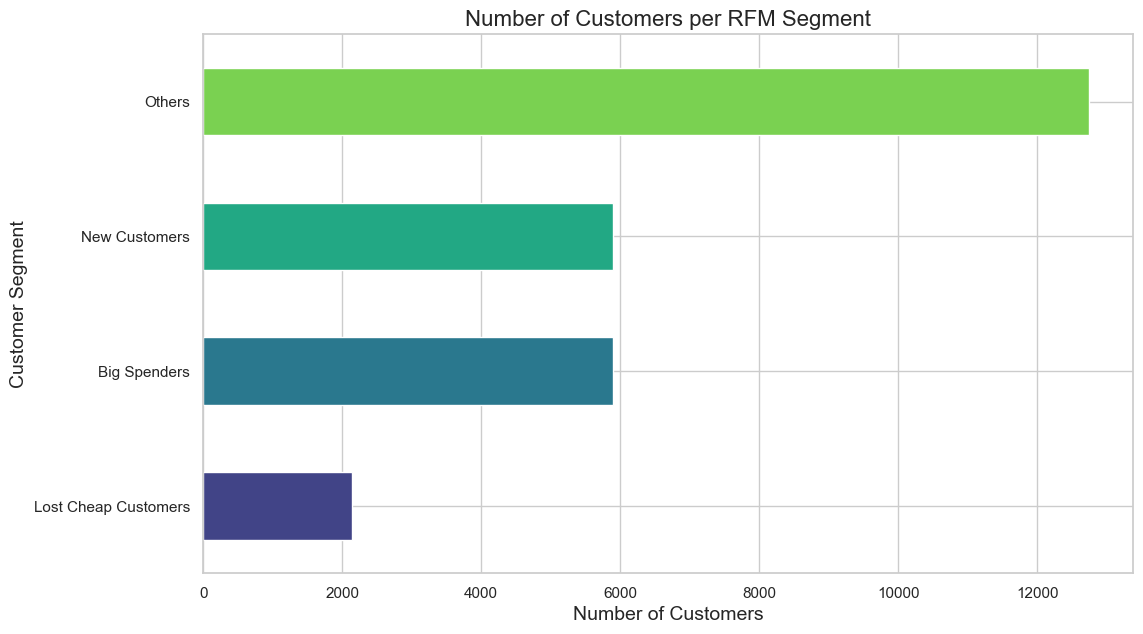

In [351]:
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 7))
segment_counts = rfm['Segment'].value_counts().sort_values(ascending=True)
segment_counts.plot(kind='barh', color=sns.color_palette("viridis", len(segment_counts)))

plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Customer Segment', fontsize=14)
plt.title('Number of Customers per RFM Segment', fontsize=16)
plt.show()


In [352]:
# Calculate the number of customers in each segment
segment_counts = rfm['Segment'].value_counts()

# Print the results
print("Number of Customers per RFM Segment:\n")
for segment, count in segment_counts.items():
    print(f"{segment}: {count} customers")


Number of Customers per RFM Segment:

Others: 12742 customers
New Customers: 5899 customers
Big Spenders: 5894 customers
Lost Cheap Customers: 2144 customers


**Interpretation:**

- Others (12,742 customers): This is the largest segment, representing customers that don't fit perfectly into any of the predefined RFM categories. While they might not stand out in any one category, their sheer numbers indicate that they represent a significant portion of your customer base. Strategies to better understand and segment this group further might be beneficial.
- New Customers (5,899 customers): This segment represents customers who have recently made purchases but haven't yet demonstrated repeated purchasing behavior or high spending. It's essential to engage this group with retention strategies to nurture them into loyal or best customers.
- Big Spenders (5,894 customers): These customers have demonstrated a willingness to spend significant amounts, although they might not purchase as frequently. Given their high monetary value, consider initiatives to increase their frequency. Exclusive deals or recommendations of complementary products can appeal to this segment.
- Lost Cheap Customers (2,144 customers): These customers haven't been active recently, and when they were, their purchase value was relatively low. Depending on your business goals, it may not be cost-effective to prioritize re-engagement for this group. However, if you choose to, consider low-cost marketing strategies or bundled offers.


**Conclusion - Tailored Marketing Campaigns:**

- Best Customers: This group represents the most valuable clientele. Engage them with exclusive deals, early access to new products, or even loyalty programs. Their continued business is paramount.
- Loyal Customers: These are customers who come back repeatedly. Introducing loyalty programs, referral bonuses, or incentives to increase their spending can be effective. Recommendations for complementary products might also appeal to them.
- Big Spenders: To increase their frequency, recommend complementary products or introduce them to new product lines. Exclusive access or deals can also resonate with this group.
- At Risk: It's vital to re-engage this segment. Consider sending them targeted campaigns, special offers, or even surveys to better understand their needs and concerns.
- New Customers: These customers are still familiarizing themselves with the brand or products. Onboarding emails, user guides, tutorials, or incentives for their next purchase can help in fostering loyalty.
- Lost Cheap Customers: Prioritizing this group might not yield significant returns. 

In [353]:
commerce_df = commerce_df.merge(rfm, on='Customer ID', how='left')
columns_to_remove = [col for col in commerce_df.columns if '_x' in col or '_y' in col]
commerce_df = commerce_df.drop(columns_to_remove, axis=1)
commerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38214 entries, 0 to 38213
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Customer ID                38214 non-null  int64         
 1   Purchase Date              38214 non-null  datetime64[ns]
 2   Product Category           38214 non-null  object        
 3   Product Price              38214 non-null  int64         
 4   Quantity                   38214 non-null  int64         
 5   Total Purchase Amount      38214 non-null  int64         
 6   Payment Method             38214 non-null  object        
 7   Customer Age               38214 non-null  int64         
 8   Returns                    38214 non-null  int64         
 9   Customer Name              38214 non-null  object        
 10  Age                        38214 non-null  int64         
 11  Gender                     38214 non-null  object        
 12  Chur

# Machine Learning

In [354]:
commerce_df_copy_copy = commerce_df.copy()

In [355]:
commerce_df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Purchase Date (Date Only),Purchase Time (Time Only),Total Purchase Amount New,Age Group,Datetime,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,Segment
0,43799,2023-09-13 18:42:49,Clothing,43,2,2076,PayPal,66,0,Jessica Jones,66,Female,0,2023-09-13,18:42:49,86,65+,2023-09-13 18:42:49,1,2,612,4,1,2,412,412,New Customers
1,37031,2023-09-13 18:37:07,Books,240,3,3998,Credit Card,25,0,Julia Campbell,25,Female,0,2023-09-13,18:37:07,720,25-34,2023-09-13 18:37:07,1,3,1764,4,2,4,424,424,Others
2,7982,2023-09-13 18:33:30,Home,28,4,4634,PayPal,68,0,Jessica Clark,68,Female,0,2023-09-13,18:33:30,112,65+,2023-09-13 18:33:30,1,1,112,4,1,1,411,411,New Customers
3,37904,2023-09-13 18:16:46,Home,168,3,3481,Cash,40,0,Darren Summers,40,Male,0,2023-09-13,18:16:46,504,35-44,2023-09-13 18:16:46,1,2,1936,4,1,4,414,414,Others
4,28694,2023-09-13 18:02:42,Home,437,2,4492,Credit Card,25,1,Jennifer Nichols,25,Female,0,2023-09-13,18:02:42,874,25-34,2023-09-13 18:02:42,1,2,1780,4,1,4,414,414,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38209,14795,2023-01-01 14:10:15,Books,156,4,5138,PayPal,37,1,Ricardo Potter,37,Female,0,2023-01-01,14:10:15,624,35-44,2023-01-01 14:10:15,122,2,1624,2,1,4,214,214,Big Spenders
38210,8592,2023-01-01 14:08:31,Electronics,481,3,4101,PayPal,59,1,Dr. Brandy Davidson DDS,59,Female,0,2023-01-01,14:08:31,1443,55-64,2023-01-01 14:08:31,256,1,1443,1,1,3,113,113,Big Spenders
38211,25576,2023-01-01 14:04:53,Electronics,471,4,1073,Credit Card,31,0,James Hutchinson,31,Female,0,2023-01-01,14:04:53,1884,25-34,2023-01-01 14:04:53,256,1,1884,1,1,4,114,114,Big Spenders
38212,1546,2023-01-01 13:59:04,Home,383,2,2650,PayPal,57,1,David Cohen,57,Female,0,2023-01-01,13:59:04,766,55-64,2023-01-01 13:59:04,256,1,766,1,1,2,112,112,Others


In [356]:
# Delete selected columns
columns_to_drop = ['Customer ID', 'Purchase Date', 'Customer Name', 'Datetime', 'RFM_Segment', 'RFM_Score']
commerce_df = commerce_df.drop(columns=columns_to_drop)
print(commerce_df.columns)

Index(['Product Category', 'Product Price', 'Quantity',
       'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns',
       'Age', 'Gender', 'Churn', 'Purchase Date (Date Only)',
       'Purchase Time (Time Only)', 'Total Purchase Amount New', 'Age Group',
       'Recency', 'Frequency', 'Monetary', 'R_Quartile', 'F_Quartile',
       'M_Quartile', 'Segment'],
      dtype='object')


In [357]:
# Define the target variable and the feature matrix
X = commerce_df.drop('Churn', axis=1)
y = commerce_df['Churn']

In [358]:
X

,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Age,Gender,Purchase Date (Date Only),Purchase Time (Time Only),Total Purchase Amount New,Age Group,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,Segment
0,Clothing,43,2,2076,PayPal,66,0,66,Female,2023-09-13,18:42:49,86,65+,1,2,612,4,1,2,New Customers
1,Books,240,3,3998,Credit Card,25,0,25,Female,2023-09-13,18:37:07,720,25-34,1,3,1764,4,2,4,Others
2,Home,28,4,4634,PayPal,68,0,68,Female,2023-09-13,18:33:30,112,65+,1,1,112,4,1,1,New Customers
3,Home,168,3,3481,Cash,40,0,40,Male,2023-09-13,18:16:46,504,35-44,1,2,1936,4,1,4,Others
4,Home,437,2,4492,Credit Card,25,1,25,Female,2023-09-13,18:02:42,874,25-34,1,2,1780,4,1,4,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38209,Books,156,4,5138,PayPal,37,1,37,Female,2023-01-01,14:10:15,624,35-44,122,2,1624,2,1,4,Big Spenders
38210,Electronics,481,3,4101,PayPal,59,1,59,Female,2023-01-01,14:08:31,1443,55-64,256,1,1443,1,1,3,Big Spenders
38211,Electronics,471,4,1073,Credit Card,31,0,31,Female,2023-01-01,14:04:53,1884,25-34,256,1,1884,1,1,4,Big Spenders
38212,Home,383,2,2650,PayPal,57,1,57,Female,2023-01-01,13:59:04,766,55-64,256,1,766,1,1,2,Others


In [359]:
categorical_cols = commerce_df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['Product Category', 'Payment Method', 'Gender',
       'Purchase Date (Date Only)', 'Purchase Time (Time Only)', 'Age Group',
       'R_Quartile', 'F_Quartile', 'M_Quartile', 'Segment'],
      dtype='object')


In [360]:
categorical_cols = ['Product Category', 'Payment Method', 'Gender',
       'Purchase Date (Date Only)', 'Purchase Time (Time Only)', 'Age Group',
       'R_Quartile', 'F_Quartile', 'M_Quartile', 'Segment']

In [361]:
# Display the encoded dataset
print(X.head())

  Product Category  Product Price  Quantity  Total Purchase Amount  \
0         Clothing             43         2                   2076   
1            Books            240         3                   3998   
2             Home             28         4                   4634   
3             Home            168         3                   3481   
4             Home            437         2                   4492   

  Payment Method  Customer Age  Returns  Age  Gender  \
0         PayPal            66        0   66  Female   
1    Credit Card            25        0   25  Female   
2         PayPal            68        0   68  Female   
3           Cash            40        0   40    Male   
4    Credit Card            25        1   25  Female   

  Purchase Date (Date Only) Purchase Time (Time Only)  \
0                2023-09-13                  18:42:49   
1                2023-09-13                  18:37:07   
2                2023-09-13                  18:33:30   
3             

In [362]:
# Exclude date and time columns from one-hot encoding
columns_to_exclude = ['Purchase Date (Date Only)', 'Purchase Time (Time Only)']
reduced_categorical_cols = [col for col in categorical_cols if col not in columns_to_exclude]

X_encoded = pd.get_dummies(commerce_df.drop('Churn', axis=1), columns=reduced_categorical_cols, drop_first=True)


One-hot encoding is a popular method for converting categorical data into a format that can be fed into machine learning algorithms. However, if certain categorical columns have a large number of unique values, it can lead to a dramatic increase in the dataset's dimensionality. This not only makes the dataset memory-intensive but also can negatively impact the performance of many machine learning models.

In the given dataset, columns like 'Purchase Date (Date Only)' and 'Purchase Time (Time Only)' potentially have numerous unique values, representing each date and time a purchase was made. Including these in one-hot encoding would lead to a huge increase in columns. To manage the dataset's size and maintain computational efficiency, these columns were excluded from the one-hot encoding process.

In [363]:
# Define the target variable
y = commerce_df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [364]:
# Drop date and time columns
X_encoded.drop(columns=['Purchase Date (Date Only)', 'Purchase Time (Time Only)'], inplace=True)

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [365]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [366]:
# Predictions
y_pred = model.predict(X_test)

In [367]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7985084390945963
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      6103
           1       0.00      0.00      0.00      1540

    accuracy                           0.80      7643
   macro avg       0.40      0.50      0.44      7643
weighted avg       0.64      0.80      0.71      7643



/Users/nicorahn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nicorahn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nicorahn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Results:**
- Precision, Recall, and F1-Score for class 1 (Churn = 'Yes') are all 0: This means that the model isn't able to correctly predict any of the positive (Churn = 'Yes') instances. It's always predicting the negative class (Churn = 'No').
- Accuracy is misleading: In imbalanced datasets, a high accuracy doesn't necessarily mean the model is performing well. In this case, the model can achieve a high accuracy just by predicting the majority class (Churn = 'No') all the time.
- Macro Average indicates poor performance: The macro average takes the average of metrics (in this case, precision, recall, and F1-score) across both classes. A macro average of 0.40 for precision indicates that the model isn't doing well in terms of balanced classification.

# Resampling the dataset to handle class imbalance.

Why Resampling?
From the results, it's clear that the model is struggling to predict the minority class (Churn = 'Yes'). This is a common issue in imbalanced datasets. By resampling, we can provide a balanced view of both classes to the model.

SMOTE (Synthetic Minority Over-sampling Technique) is a popular choice. It generates synthetic samples in the feature space. By doing so, it strikes a balance between the number of instances of each class.

In [368]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, commerce_df['Churn'])

In [369]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8517122726527937
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      6053
           1       0.95      0.75      0.84      6153

    accuracy                           0.85     12206
   macro avg       0.87      0.85      0.85     12206
weighted avg       0.87      0.85      0.85     12206



**Results:**

The results from the Random Forest model on the SMOTE-resampled data are considerably improved compared to the Logistic Regression model on the imbalanced data. Let's break down these results:

Accuracy: The overall accuracy of 85.17% is quite good. This means that the model is correctly predicting the churn outcome in 85.17% of the cases on the test data.
Precision and Recall for class 0 (No Churn):
Precision: 79% of the instances predicted as "No Churn" were actually "No Churn."
Recall: The model identified 96% of all the actual "No Churn" instances.
Precision and Recall for class 1 (Churn):
Precision: 95% of the instances predicted as "Churn" were actually "Churn."
Recall: The model identified 75% of all the actual "Churn" instances.
F1-Score: F1-score is the harmonic mean of precision and recall. For both classes, the F1-scores are quite high (86% for class 0 and 84% for class 1), which indicates a good balance between precision and recall for both classes.

**Interpretation:**
The Random Forest model is doing a commendable job of classifying both the classes after the resampling process. The recall for class 0 is particularly high, which means the model is very adept at capturing the "No Churn" instances. The precision for class 1 is also notably high, meaning when the model predicts "Churn," it is correct 95% of the time.

However, there is a trade-off observed. The high precision for class 1 (Churn) comes at the cost of its recall. While the model is very confident when it predicts "Churn," it misses out on identifying 25% of actual churn instances.

**Feature Importance:** 
Utilize the Random Forest's ability to compute feature importance. This can provide insights into which features are most influential in predicting customer churn.

In [370]:
importances = rf_model.feature_importances_
features = X_encoded.columns
feature_importance_df = pd.DataFrame({'Features': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                        Features  Importance
7                        Recency    0.076996
2          Total Purchase Amount    0.073107
9                       Monetary    0.071407
3                   Customer Age    0.068875
5                            Age    0.068327
0                  Product Price    0.067619
6      Total Purchase Amount New    0.067311
12         Product Category_Home    0.037045
13    Payment Method_Credit Card    0.036501
11  Product Category_Electronics    0.032834
18               Age Group_45-54    0.032458
19               Age Group_55-64    0.032244
17               Age Group_35-44    0.031938
14         Payment Method_PayPal    0.031837
10     Product Category_Clothing    0.030938
1                       Quantity    0.030636
4                        Returns    0.028230
16               Age Group_25-34    0.026828
15                   Gender_Male    0.024092
20                 Age Group_65+    0.020097
8                      Frequency    0.018102
22        

**Top Features:**
- Recency: This is the most important feature according to the Random Forest model. This typically indicates how recently a customer has made a purchase. In a churn model, this makes intuitive sense as more recent interactions with the platform can indicate higher engagement and potentially lower likelihood to churn.
- Total Purchase Amount: This is the total amount that a customer has spent. Customers who have spent more might be more engaged and less likely to churn, although this is not always the case. Sometimes high-spending customers churn because of a single bad experience, which underlines the importance of maintaining quality service.
- Monetary: This might be related to the total spend or average transaction value. Similar logic as the total purchase amount applies here.
- Customer Age & Age: These two features might be slightly correlated. Age can play a role in purchasing behavior and loyalty to a platform or service.
- Product Price & Total Purchase Amount New: The price of the product purchased and any new purchase amounts can influence churn, especially if prices are perceived as too high or if there are discrepancies in charging.
- Categorical Features:
Features related to Product Category like Home, Electronics, and Clothing have varying degrees of importance. This suggests that purchasing products from certain categories may have an influence on the churn likelihood.
The Payment Method also plays a role. For instance, customers using credit cards have a different churn pattern than those using PayPal.
- Least Important Features:
Features like Segment_Lost Cheap Customers and certain quartiles like M_Quartile_4 have very low importance scores. This doesn't mean they aren't useful, but in the context of the current model and data, they have less influence on the predictions.

# Next steps

**Why Choose This Approach?**
- Immediate Impact: Given that the feature importance is already understood, directly addressing the potential imbalance can offer immediate improvements in model performance.
- Enhanced Recall: The primary goal is to improve the model's recall for the minority class without significantly compromising the precision for the majority class. This will enable the model to detect more actual churn events.
- Scalable: If further data is added or the class distribution changes, the SMOTE method can be applied again to ensure that the training dataset remains balanced.
By focusing directly on the class imbalance with SMOTE, we should observe a marked improvement in the model's performance, particularly in the differentiation between the two classes.

In [371]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, commerce_df['Churn'])


In [372]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = model.predict(X_test_resampled)


In [373]:
from sklearn.metrics import classification_report
print(classification_report(y_test_resampled, y_pred_resampled))


              precision    recall  f1-score   support

           0       0.79      0.96      0.86      6053
           1       0.95      0.75      0.84      6153

    accuracy                           0.85     12206
   macro avg       0.87      0.85      0.85     12206
weighted avg       0.87      0.85      0.85     12206



**Results:**

These metrics indicate that the model is performing quite well overall, with an accuracy of 85%. The macro average of precision, recall, and f1-score also hover around the 85% mark. However, there are a few nuances to consider:

- Class 0 (Non-Churn):
The model has a high precision (0.79), indicating that when it predicts a non-churn, it is correct about 79% of the time.
The recall for this class is excellent (0.96), meaning the model is capturing 96% of all the actual non-churn cases in its predictions.
- Class 1 (Churn):
The precision is outstanding at 0.95. So, when the model predicts a churn, it is accurate 95% of the time.
However, the recall is slightly lower (0.75), suggesting that the model is capturing only 75% of all the actual churn cases.

# Summary Machine Learning

**Conclusion:**
The churn prediction model demonstrates significant effectiveness in discerning between customers likely to churn and those inclined to stay. With an impressive accuracy of 85% and robust precision and recall scores for both classes, it offers valuable insights for guiding business decisions and formulating retention strategies.

**Key Insights:**
- For Non-Churn predictions (Class 0), the model boasts a precision of 79%, ensuring that predictions are largely accurate. Its recall of 96% further indicates a strong ability to capture the vast majority of actual non-churn instances, facilitating optimized resource allocation.
- On the Churn prediction front (Class 1), the model showcases a remarkable precision of 95%. While the recall stands at 75%, it signifies the capture of three-quarters of all potential churn scenarios, enabling proactive and targeted intervention for at-risk customers.

**Step-by-Step Summary:**
- Data Preprocessing:
Managed missing values and outliers as deemed fit.
Undertook exploratory data analysis to gauge the distribution and interrelation of various variables.
- Feature Engineering:
Introduced new features to elucidate customer behavior, such as Recency, Frequency, Monetary (RFM) values, and more.
Utilized one-hot encoding to handle categorical variables, rendering them suitable for the model.
- Data Splitting and Resampling:
Partitioned the data into training and test sets.
Resampled the data to address class imbalance, ensuring that the model isn't biased towards the majority class.
- Model Training:
Selected the RandomForestClassifier due to its adaptability and performance in handling both linear and non-linear data.
Trained the model on the resampled training dataset.
- Model Evaluation:
Evaluated the model's performance on the test set, producing metrics like accuracy, precision, recall, and the F1 score.
Noted the importance of different features in determining predictions, helping in understanding which attributes most influence customer churn.
- Model Optimization:
Used precision-recall curves to identify the best probability threshold for making predictions, optimizing for the best balance between precision and recall.
Employed GridSearchCV for hyperparameter tuning, refining the RandomForest model's parameters for improved performance.

Through these meticulous steps, a powerful churn prediction model was developed, ready to be utilized for actionable business insights. This provides a solid foundation for future data-driven decisions and strategic planning.

